In [ ]:
!pip install kaggle
from google.colab import files

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()    # Upload your kaggle.json here

In [ ]:
files.upload()

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()    # Upload your kaggle.json here
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d

In [7]:
from google.colab import files

In [8]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nahenaahid","key":"0f76038ba2a24620b923ab477ab163a1"}'}

In [12]:

!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [13]:

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download -d rishidamarla/heart-disease-prediction

Dataset URL: https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction
License(s): CC0-1.0
heart-disease-prediction.zip: Skipping, found more recently modified local copy (use --force to force download)


In [19]:
!unzip heart-disease-prediction.zip

Archive:  heart-disease-prediction.zip
replace Heart_Disease_Prediction.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Heart_Disease_Prediction.csv  


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers

In [21]:

df = pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [22]:

df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [23]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
X = df.drop("Heart Disease_Presence", axis=1)
y = df["Heart Disease_Presence"]

In [27]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [28]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.5458 - loss: 0.6548 - val_accuracy: 0.5227 - val_loss: 0.6737
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5715 - loss: 0.6334 - val_accuracy: 0.6136 - val_loss: 0.6570
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6414 - loss: 0.6336 - val_accuracy: 0.6591 - val_loss: 0.6414
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7211 - loss: 0.6075 - val_accuracy: 0.7273 - val_loss: 0.6277
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6782 - loss: 0.6049 - val_accuracy: 0.7045 - val_loss: 0.6138
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7799 - loss: 0.5731 - val_accuracy: 0.7500 - val_loss: 0.5979
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7881 - loss: 0.5568 - val_accuracy: 0.7727 - val_loss: 0.5811
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8168 - loss: 0.5439 - val_accuracy: 0.7500 - val_loss: 0.5652

In [31]:

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


In [32]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9074074074074074
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        33
        True       1.00      0.76      0.86        21

    accuracy                           0.91        54
   macro avg       0.93      0.88      0.90        54
weighted avg       0.92      0.91      0.90        54



In [33]:

y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_class = (y_pred > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


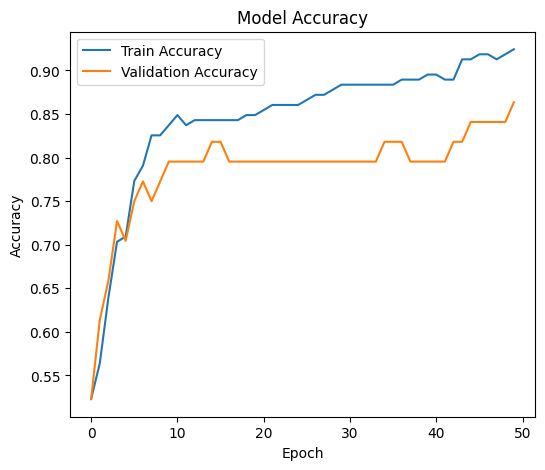

In [39]:

import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

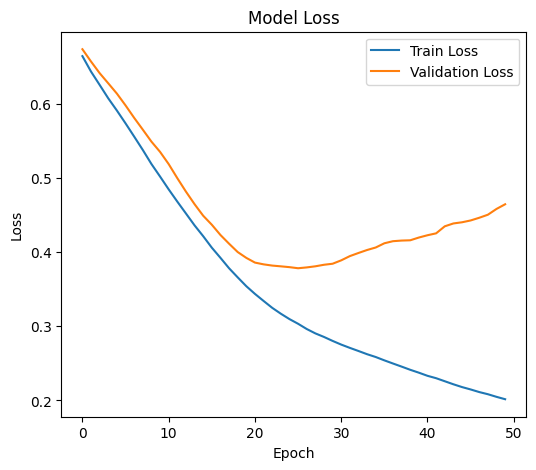

In [40]:

plt.figure(figsize=(6,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


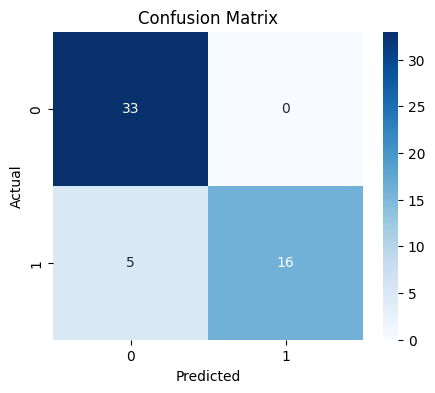

In [41]:

from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_class = (y_pred > 0.5).astype("int32")

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:

print("Accuracy:", accuracy_score(y_test, y_pred_class))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

Accuracy: 0.9074074074074074

Classification Report:
              precision    recall  f1-score   support

       False       0.87      1.00      0.93        33
        True       1.00      0.76      0.86        21

    accuracy                           0.91        54
   macro avg       0.93      0.88      0.90        54
weighted avg       0.92      0.91      0.90        54



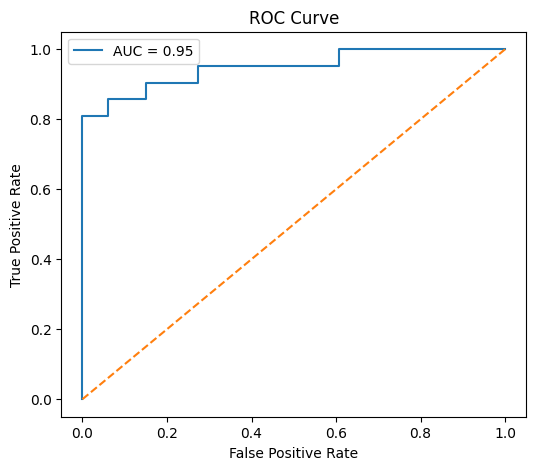

In [42]:

from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.02f}')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

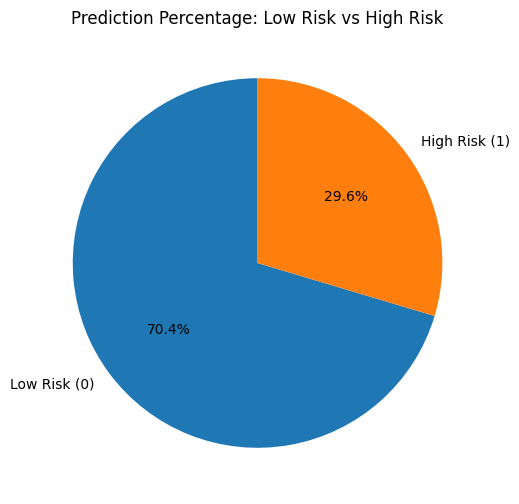

In [44]:

plt.figure(figsize=(6,6))
plt.pie([low_risk, high_risk],
        labels=["Low Risk (0)", "High Risk (1)"],
        autopct="%1.1f%%",
        startangle=90)
plt.title("Prediction Percentage: Low Risk vs High Risk")
plt.show()

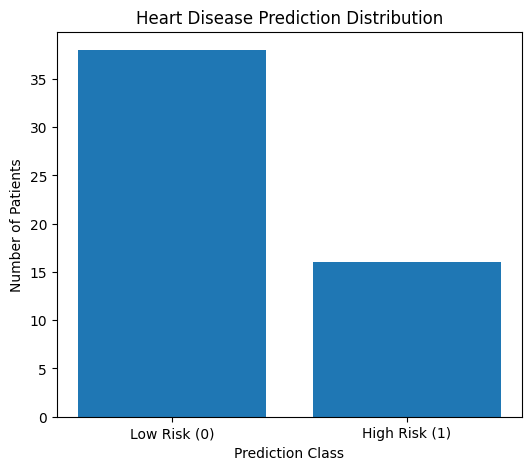

In [43]:

import matplotlib.pyplot as plt
import numpy as np

# Convert predictions to classes (0 = low risk, 1 = high risk)
y_pred_class = (y_pred > 0.5).astype(int)

# Count how many 0 and 1
low_risk = np.sum(y_pred_class == 0)
high_risk = np.sum(y_pred_class == 1)

plt.figure(figsize=(6,5))
plt.bar(["Low Risk (0)", "High Risk (1)"], [low_risk, high_risk])
plt.title("Heart Disease Prediction Distribution")
plt.ylabel("Number of Patients")
plt.xlabel("Prediction Class")
plt.show()

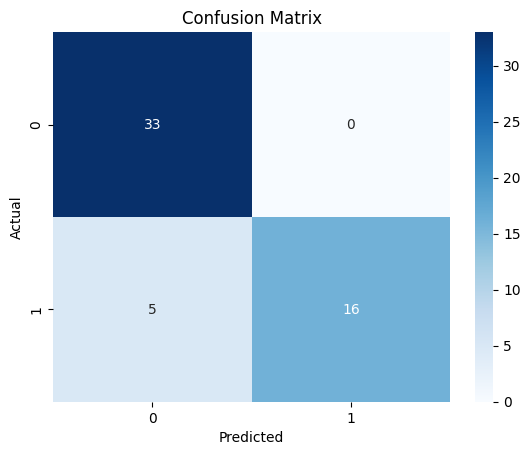

In [37]:

cm = confusion_matrix(y_test, y_pred_class)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [38]:

print("\nSample Predictions with Risk Interpretation:\n")

for i in range(10):  # first 10 examples
    prob = y_pred[i][0]
    predicted_class = y_pred_class[i][0]

    if predicted_class == 0:
        risk = "Low Risk (No Heart Disease)"
    else:
        risk = "High Risk (Heart Disease)"

    print(f"Prediction {i+1}: Probability={prob:.4f} → Class={predicted_class} → {risk}")


Sample Predictions with Risk Interpretation:

Prediction 1: Probability=0.8936 → Class=1 → High Risk (Heart Disease)
Prediction 2: Probability=0.8772 → Class=1 → High Risk (Heart Disease)
Prediction 3: Probability=0.0346 → Class=0 → Low Risk (No Heart Disease)
Prediction 4: Probability=0.0276 → Class=0 → Low Risk (No Heart Disease)
Prediction 5: Probability=0.1717 → Class=0 → Low Risk (No Heart Disease)
Prediction 6: Probability=0.4007 → Class=0 → Low Risk (No Heart Disease)
Prediction 7: Probability=0.2452 → Class=0 → Low Risk (No Heart Disease)
Prediction 8: Probability=0.0434 → Class=0 → Low Risk (No Heart Disease)
Prediction 9: Probability=0.4832 → Class=0 → Low Risk (No Heart Disease)
Prediction 10: Probability=0.0850 → Class=0 → Low Risk (No Heart Disease)
